In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import json
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import ast
from sklearn.preprocessing import MinMaxScaler


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore")

In [3]:
airbnblist = pd.read_csv('listings.csv')
airbnblist.shape

(14274, 75)

<Axes: >

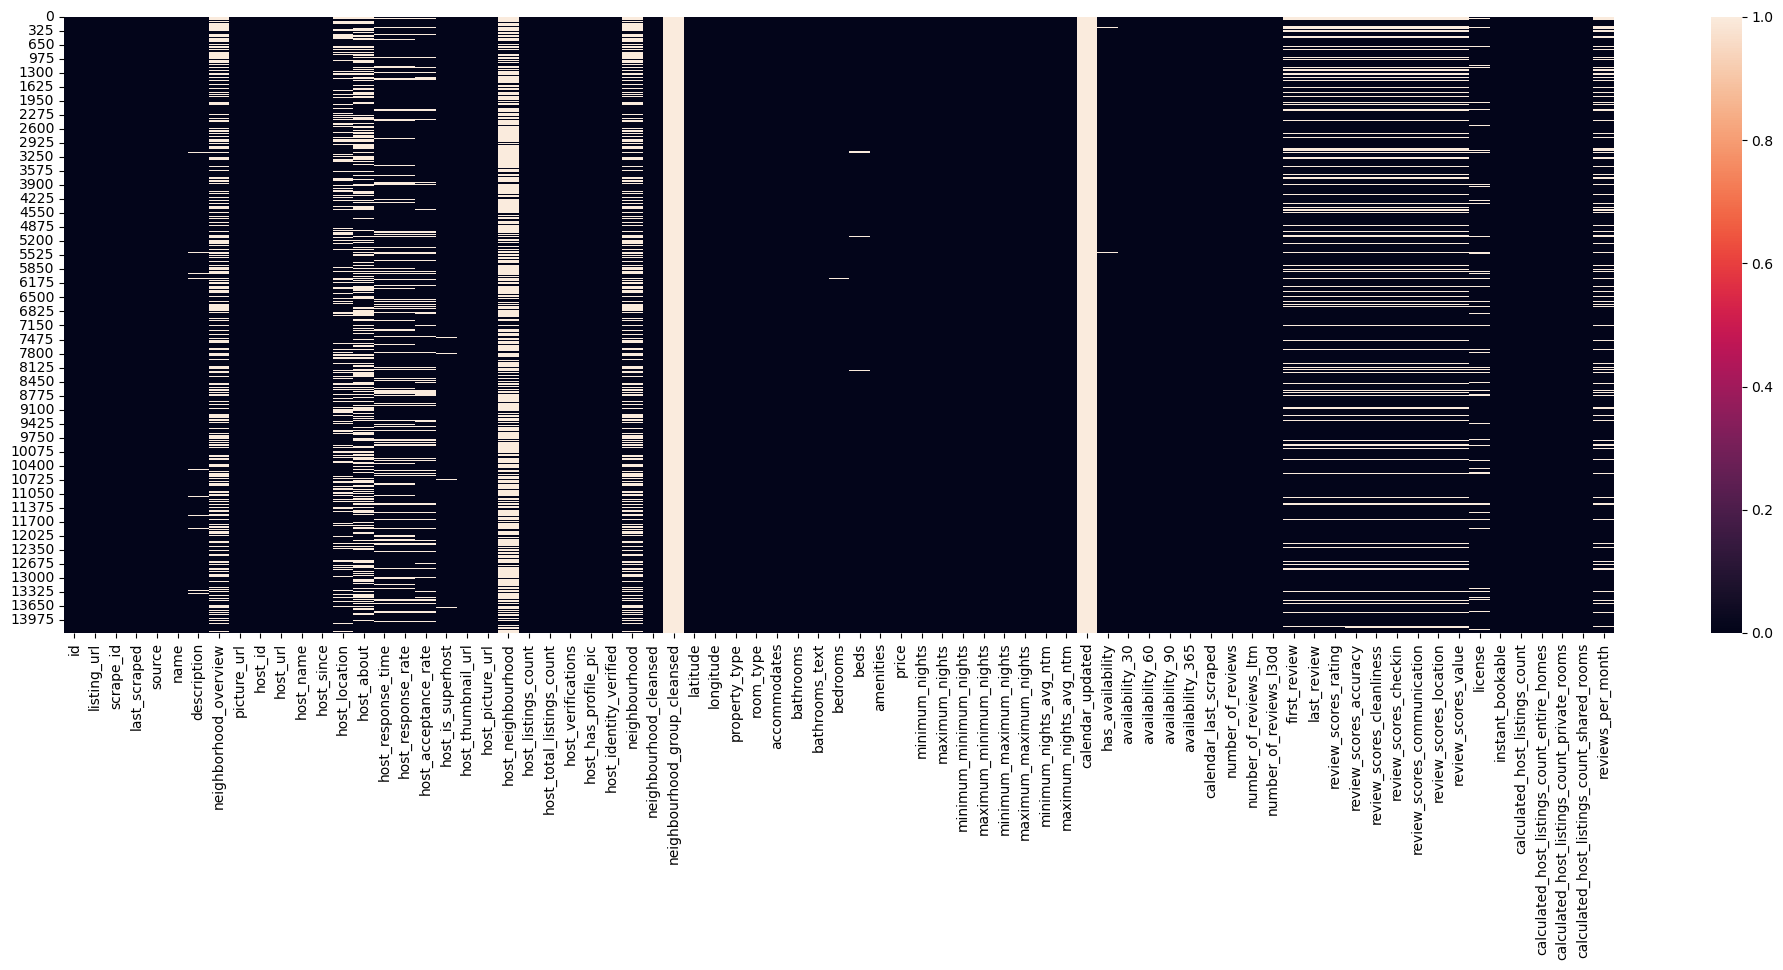

In [4]:
plt.figure(figsize=(25,8))  # 这里的数字可以根据你的需要调整，宽度和高度
sns.heatmap(pd.isnull(airbnblist))

In [ ]:
a=list(airbnblist.columns)
b=[]
for i in a:
    c=airbnblist[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

In [33]:
df = airbnblist.drop(['calendar_updated','neighbourhood_group_cleansed','host_neighbourhood',
                      'description','host_about','host_id','host_thumbnail_url','host_name',
                      'host_neighbourhood','host_url','id','license','listing_url','name','neighborhood_overview',
                      'picture_url','source','host_since','last_scraped','host_picture_url','calendar_last_scraped','scrape_id','host_location',
                      'neighbourhood'],axis=1)

In [34]:
time_mapping = {
    'a few days or more': 0,
    'within a day': 1,
    'within a few hours': 2,
    'within an hour': 3
}

# 使用map函数应用映射
df['host_response_time'] = df['host_response_time'].map(time_mapping)

In [35]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)


In [36]:
df['email'] = df['host_verifications'].apply(lambda x: 1 if 'email' in x else 0)
df['phone'] = df['host_verifications'].apply(lambda x: 1 if 'phone' in x else 0)
df['work_email'] = df['host_verifications'].apply(lambda x: 1 if 'work_email' in x else 0)
df = df.drop('host_verifications', axis=1)

In [38]:
df1 = df.dropna()
df1.head(1)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,email,phone,work_email
8,3.0,100.0,100.0,t,1,1,t,t,"South Penrith, New South Wales, Australia",-33.77996,150.69263,Entire home,Entire home/apt,6,1.5,1.5 baths,4.0,4.0,"[""First aid kit"", ""Free driveway parking on premises \u2013 2 spaces"", ""Free washer \u2013 In building"", ""Hot water kettle"", ""Toaster"", ""Freezer"", ""Coffee"", ""Outdoor furniture"", ""Heating - split type ductless system"", ""Electric stove"", ""Game console: PS3"", ""Smoke alarm"", ""Fast wifi \u2013 54 Mbps"", ""Hair dryer"", ""Wine glasses"", ""Coffee maker"", ""Hot water"", ""Dining table"", ""Microwave"", ""Free street parking"", ""Long term stays allowed"", ""Keypad"", ""Barbecue utensils"", ""Kitchen"", ""Fire extinguisher"", ""Cooking basics"", ""Shampoo"", ""Cleaning products"", ""Essentials"", ""Refrigerator"", ""Extra pillows and blankets"", ""Clothing storage: wardrobe"", ""Bathtub"", ""Dishes and silverware"", ""Free dryer \u2013 In building"", ""AC - split type ductless system"", ""65\"" HDTV with Disney+, Netflix"", ""Single level home"", ""Security cameras on property"", ""Oven"", ""Bed linens"", ""Self check-in"", ""Hangers"", ""Iron"", ""Outdoor dining area"", ""Drying rack for clothing"", ""Conditioner"", ""Ceiling fan"", ""Private backyard \u2013 Fully fenced"", ""Body soap"", ""BBQ grill""]",$230.00,1,21,1,5,1125,1125,1.1,1125.0,t,0,0,0,0,65,64,8,2023-03-12,2024-03-16,4.89,4.94,4.97,5.0,4.97,4.94,4.83,f,1,1,0,0,5.23,1,1,0


In [39]:
df1['bathrooms_shared'] = df1['bathrooms_text'].apply(lambda x: 1 if 'shared' in x else 0)
df1['bathrooms_private'] = df1['bathrooms_text'].apply(lambda x: 1 if 'private' in x else 0)
df1 = df1.drop('bathrooms_text',axis=1)

In [40]:
df1['first_review'] = pd.to_datetime(df1['first_review'])
df1['last_review'] = pd.to_datetime(df1['last_review'])
df1['airbnb_age'] = (df1['last_review'] - df1['first_review']).map(lambda x:x.days)
df1['price'] = df1['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [41]:
df1 = df1.drop('first_review' , axis=1)
df1 = df1.drop('last_review', axis=1)

In [ ]:
a=list(df1.columns)
b=[]
for i in a:
    c=df1[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

In [42]:
dft = df1[['amenities']]
dft.head(2)

,amenities
8,"[""First aid kit"", ""Free driveway parking on premises \u2013 2 spaces"", ""Free washer \u2013 In building"", ""Hot water kettle"", ""Toaster"", ""Freezer"", ""Coffee"", ""Outdoor furniture"", ""Heating - split type ductless system"", ""Electric stove"", ""Game console: PS3"", ""Smoke alarm"", ""Fast wifi \u2013 54 Mbps"", ""Hair dryer"", ""Wine glasses"", ""Coffee maker"", ""Hot water"", ""Dining table"", ""Microwave"", ""Free street parking"", ""Long term stays allowed"", ""Keypad"", ""Barbecue utensils"", ""Kitchen"", ""Fire extinguisher"", ""Cooking basics"", ""Shampoo"", ""Cleaning products"", ""Essentials"", ""Refrigerator"", ""Extra pillows and blankets"", ""Clothing storage: wardrobe"", ""Bathtub"", ""Dishes and silverware"", ""Free dryer \u2013 In building"", ""AC - split type ductless system"", ""65\"" HDTV with Disney+, Netflix"", ""Single level home"", ""Security cameras on property"", ""Oven"", ""Bed linens"", ""Self check-in"", ""Hangers"", ""Iron"", ""Outdoor dining area"", ""Drying rack for clothing"", ""Conditioner"", ""Ceiling fan"", ""Private backyard \u2013 Fully fenced"", ""Body soap"", ""BBQ grill""]"
23,"[""High chair"", ""Hot water kettle"", ""Toaster"", ""Garden view"", ""Dedicated workspace"", ""Outdoor furniture"", ""Clothing storage: closet"", ""Crib - available upon request"", ""Room-darkening shades"", ""Smoke alarm"", ""Hair dryer"", ""Coffee maker"", ""Hot water"", ""Lockbox"", ""Shower gel"", ""Microwave"", ""TV"", ""Dining table"", ""Free street parking"", ""Private outdoor pool - available all year, open 24 hours, saltwater"", ""Kitchen"", ""Pool view"", ""Cleaning products"", ""Shampoo"", ""Mountain view"", ""Essentials"", ""Refrigerator"", ""Dishwasher"", ""Extra pillows and blankets"", ""Dishes and silverware"", ""Bathtub"", ""Baking sheet"", ""Patio or balcony"", ""Free dryer \u2013 In unit"", ""AC - split type ductless system"", ""Private hot tub"", ""Security cameras on property"", ""Oven"", ""Heating"", ""Free washer \u2013 In unit"", ""Self check-in"", ""Carbon monoxide alarm"", ""Rice maker"", ""Hangers"", ""Iron"", ""Outdoor dining area"", ""Drying rack for clothing"", ""Fast wifi \u2013 110 Mbps"", ""Free parking on premises"", ""Private backyard \u2013 Fully fenced"", ""Bread maker"", ""City skyline view"", ""\u5176\u4ed6 stainless steel induction stove"", ""BBQ grill""]"


In [ ]:
dft['amenities'] = dft['amenities'].apply(ast.literal_eval)

In [ ]:
all_amenities = dft['amenities'].explode()
amenities_count = all_amenities.value_counts()
amenities_df = amenities_count.reset_index()
amenities_df.columns = ['Amenity', 'Count']
amenities_df.head(20)

In [ ]:
top20 = amenities_df.iloc[:20,0].tolist()
top20

In [ ]:
df1['amenities'] = df1['amenities'].apply(ast.literal_eval)

In [43]:
amenities_list = ['Smoke alarm', 'Kitchen', 'Wifi', 'Essentials', 'Dishes and silverware', 'Hot water', 
                  'Hangers', 'Hair dryer', 'Bed linens', 'Microwave', 'Iron', 'Cooking basics', 
                  'Refrigerator', 'Shampoo', 'Hot water kettle', 'Self check-in', 'Toaster', 'TV', 
                  'Long term stays allowed', 'Washer']

for amenity in amenities_list:
    df1[amenity] = df1['amenities'].apply(lambda x: 1 if amenity in x else 0)

In [ ]:
df1.head(1)

In [45]:
# df1 = df1.drop(['neighbourhood_cleansed','property_type'],axis=1)
df1 = df1.drop(['property_type'],axis=1)

In [46]:
df1 = df1.drop('amenities', axis=1)
df1.shape

(6155, 72)

In [ ]:
df1.shape(1)

In [47]:
df2 = pd.get_dummies(df1,dtype=float,drop_first=True)
df2.shape


(6155, 592)

In [ ]:
df2 = df2.sample(frac=1,random_state=42).reset_index(drop=True)
df2.head(1)


In [ ]:
# scaler = MinMaxScaler()
# x_scaled = scaler.fit_transform(df2)
# df3 = pd.DataFrame(x_scaled, columns=df2.columns)
# df3.head(1)

In [ ]:
df2.to_csv('listing_filtered.csv',index=False)